<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [7]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

sns.set_context("poster")
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_style("whitegrid")

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [717]:
# Read CSV
house_csv = r"C:\Users\pabarca\OneDrive - GRUPO GRANSOLAR\Desktop\IOD - Python\DATA\Sacramento_transactions.csv"
data =pd.read_csv(house_csv)

In [719]:
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [721]:
data.shape

(985, 12)

In [723]:
data.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [725]:
data.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [727]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [729]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
980    False
981    False
982    False
983    False
984    False
Length: 985, dtype: bool

In [33]:
data['zip'] = data['zip'].astype(str)

In [737]:
data.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,814.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1591.146192,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,663.841930,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,484.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,1144.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1418.500000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1851.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


In [733]:
data['sq__ft'] = data['sq__ft'].replace(0,np.nan)

In [735]:
nan = data['sq__ft'].isna()
nan

0      False
1      False
2      False
3      False
4      False
       ...  
980    False
981    False
982    False
983    False
984    False
Name: sq__ft, Length: 985, dtype: bool

In [709]:
nan_rows = data[data['sq__ft'].isna()]
nan_rows

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,y_mean,Yhat


In [57]:
%matplotlib inline

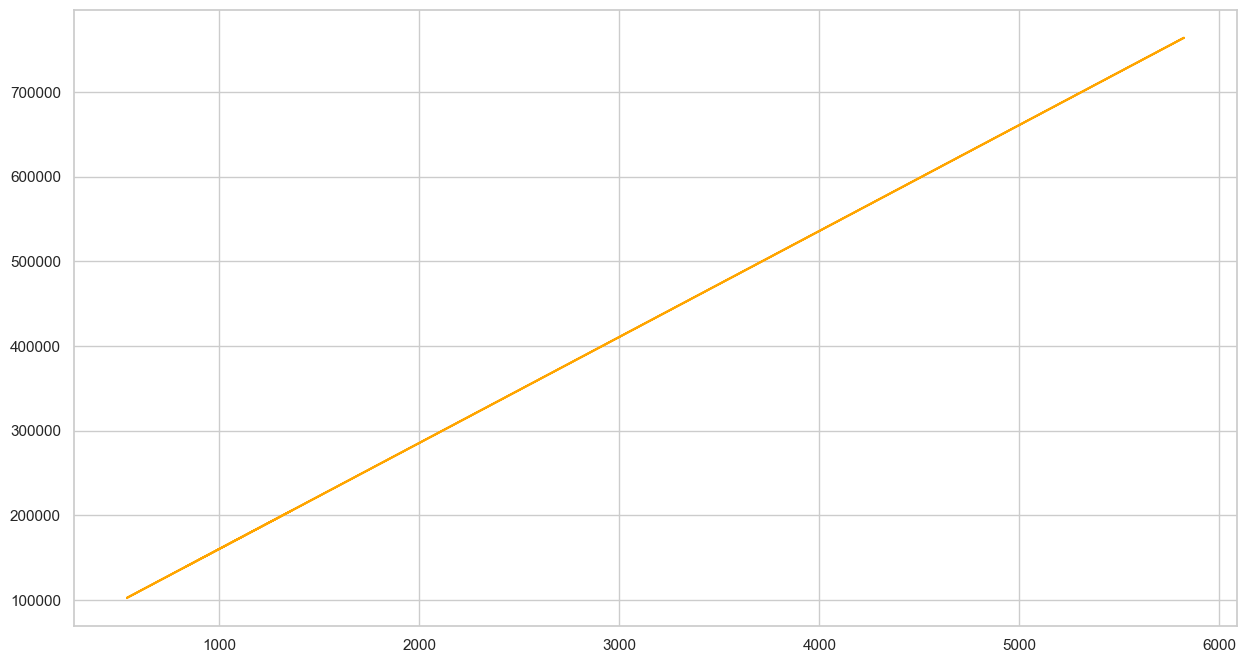

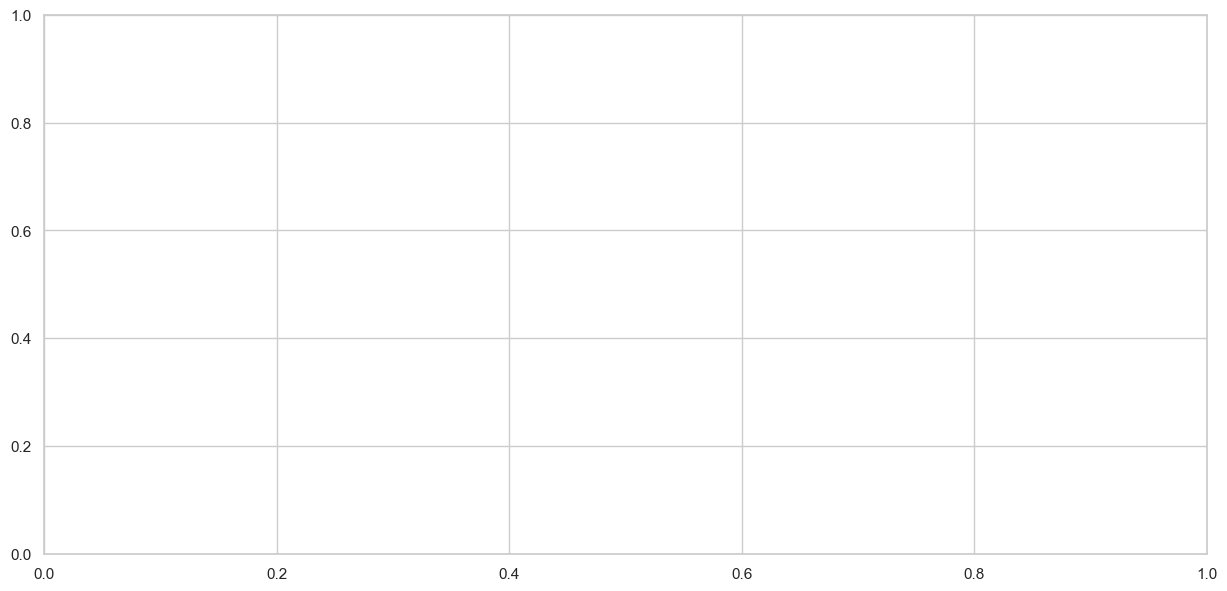

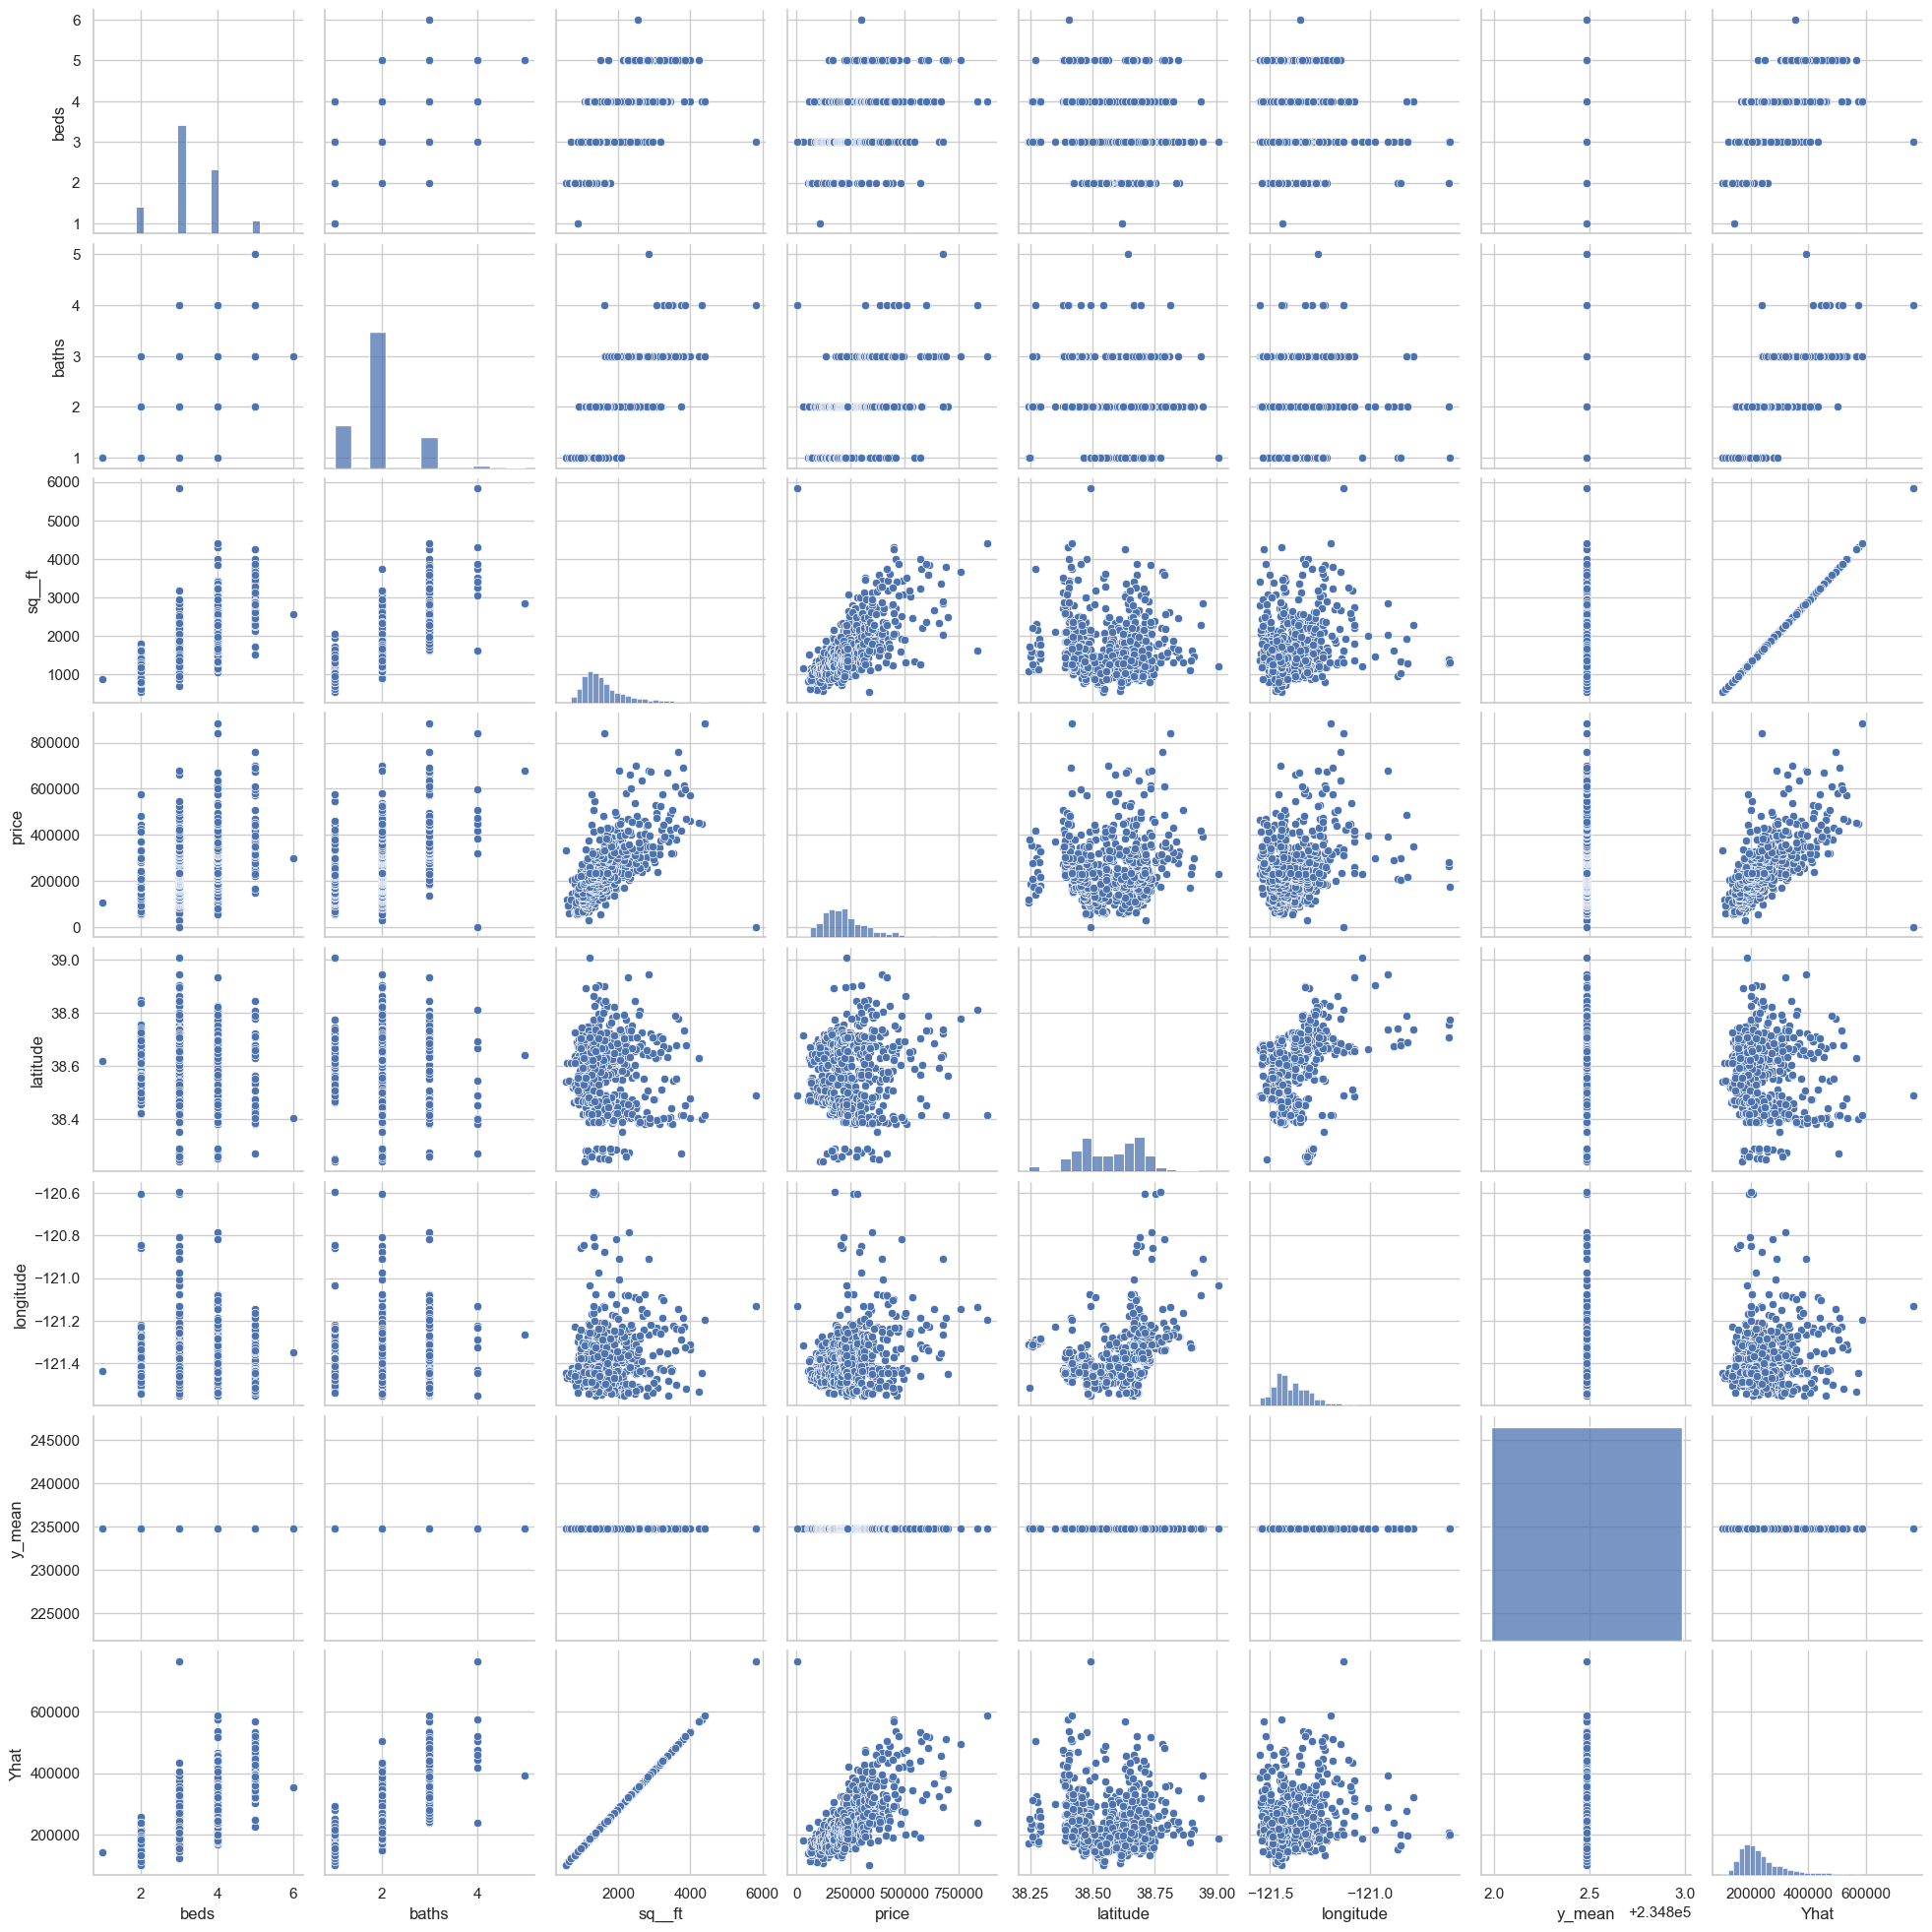

In [711]:
sns.pairplot(data)
plt.show()

In [739]:
data[data['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,NaN,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,NaN,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,NaN,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,NaN,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,NaN,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,NaN,Condo,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,NaN,Residential,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,NaN,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,NaN,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539


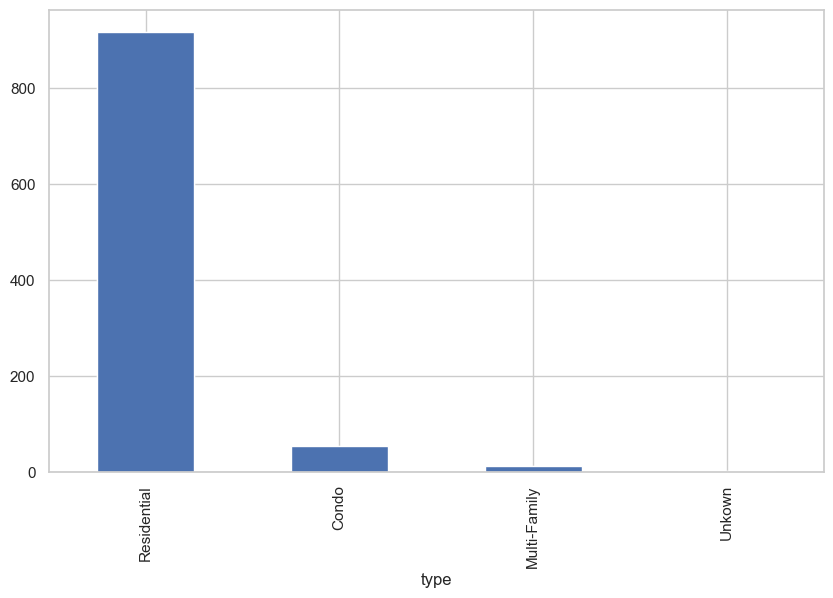

In [69]:
data['type'].value_counts().plot(kind='bar')
plt.show()

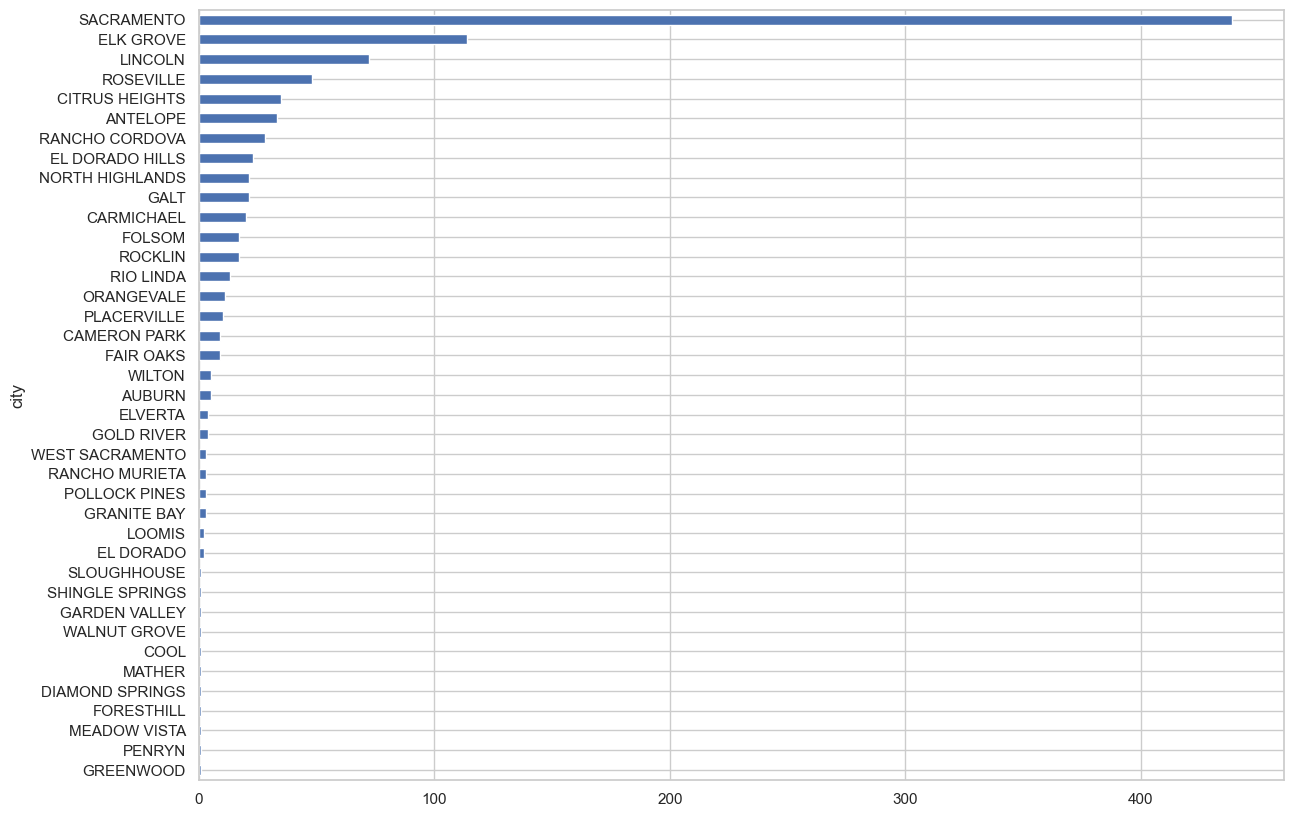

In [79]:
data['city'].value_counts().sort_values().plot(kind='barh', figsize=(14,10))
plt.show()

In [741]:
data.loc[data['beds'] == 0, 'type'] = 'Plot'


In [743]:
data[data['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,NaN,Plot,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,NaN,Plot,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,NaN,Plot,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,NaN,Plot,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,NaN,Plot,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,NaN,Plot,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,NaN,Plot,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,NaN,Plot,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,NaN,Plot,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539


In [745]:
data[data['type'] == 'Plot']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,NaN,Plot,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,NaN,Plot,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,NaN,Plot,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,NaN,Plot,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,NaN,Plot,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,NaN,Plot,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,NaN,Plot,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,NaN,Plot,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,NaN,Plot,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539


In [747]:
data.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,814.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1591.146192,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,663.841930,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,484.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,1144.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1418.500000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1851.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


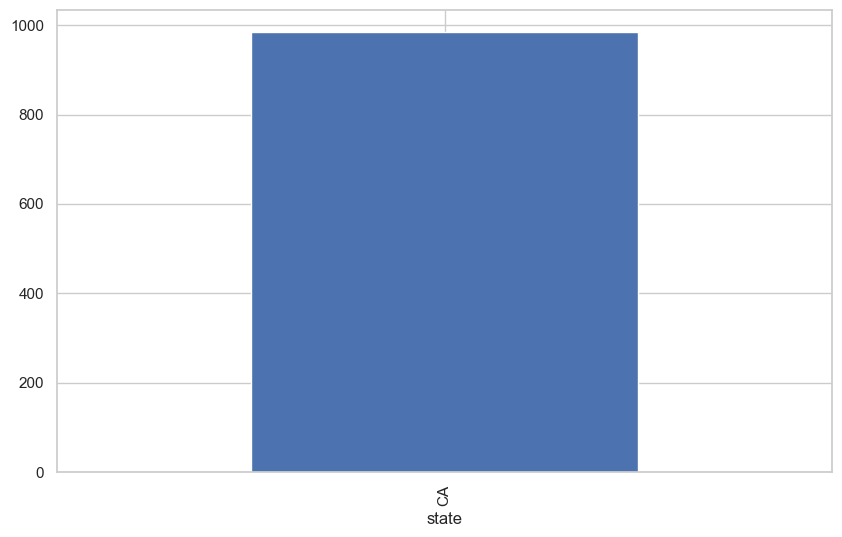

In [123]:
data['state'].value_counts().plot(kind= 'bar')
plt.show()

In [147]:
import folium
import pandas as pd

m = folium.Map(location=[8.575764, -121.478851], tiles="OpenStreetMap", zoom_start=1, attr="Map data @ OpenStreetMap contributors")

for i in range(0, len(data.head(1000))):
    folium.Marker(
        location=[data.iloc[i]['latitude'], data.iloc[i]['longitude']]
                  ).add_to(m)
display(m);

In [145]:
m = folium.Map(location=[8.575764, -121.478851], tiles="Mapbox Bright", zoom_start=1, attr="Map data @ Mapbox Bright contributors")

for i in range(0, len(data.head(1000))):
    folium.Marker(
        location=[data.iloc[i]['latitude'], data.iloc[i]['longitude']]
                  ).add_to(m)
display(m)

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [ ]:
# ANSWER


In [ ]:
## Price is target variable. Based on other predictor variables we'll predict price.

#### 2.2 List all possible variables which might be Predictor variable.

In [749]:
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836.0,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167.0,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796.0,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852.0,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797.0,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [751]:
data['beds'] = data['beds'].replace(0,np.nan)

In [757]:
data.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,877.000000,985.000000,814.000000,985.000000,985.000000,985.000000
mean,95750.697462,3.270239,1.776650,1591.146192,234144.263959,38.607732,-121.355982
std,85.176072,0.864675,0.895371,663.841930,138365.839085,0.145433,0.138278
min,95603.000000,1.000000,0.000000,484.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,3.000000,1.000000,1144.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1418.500000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1851.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [ ]:
# ANSWER
## beds
## baths
## sqft
## Type

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [485]:
# ANSWER

In [155]:
def draw_scatter_plot(X, Y):
    ### Plot the data
    # create a figure
    fig = plt.figure(figsize=(15,7))
    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c='b')

    plt.show();

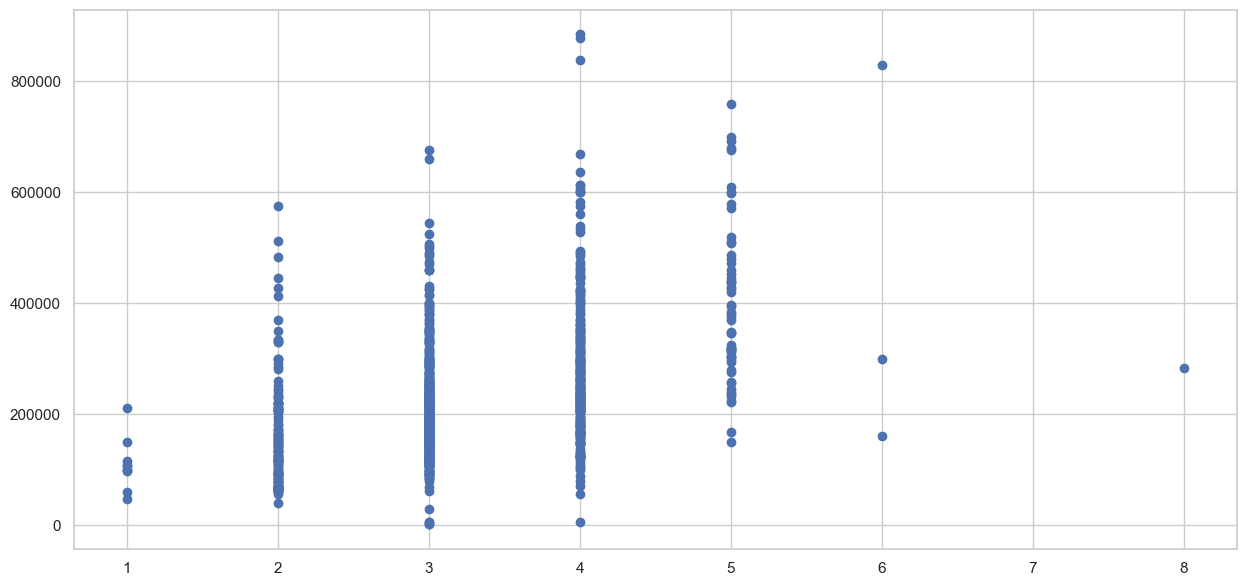

In [753]:
draw_scatter_plot(data['beds'], data['price'])

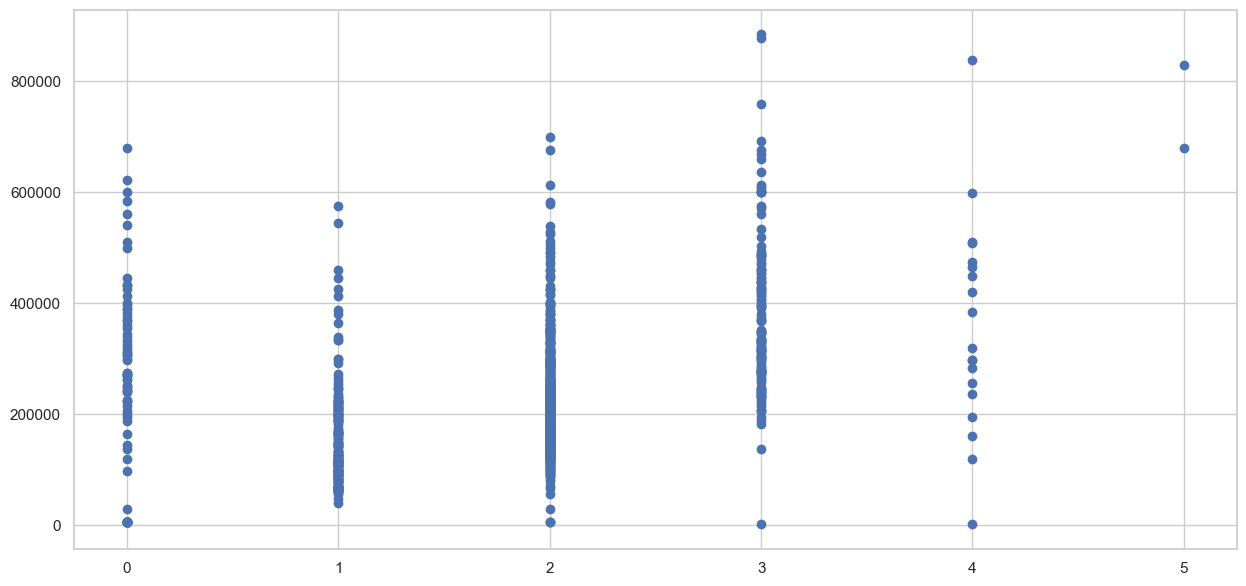

In [755]:
draw_scatter_plot(data['baths'], data['price'])

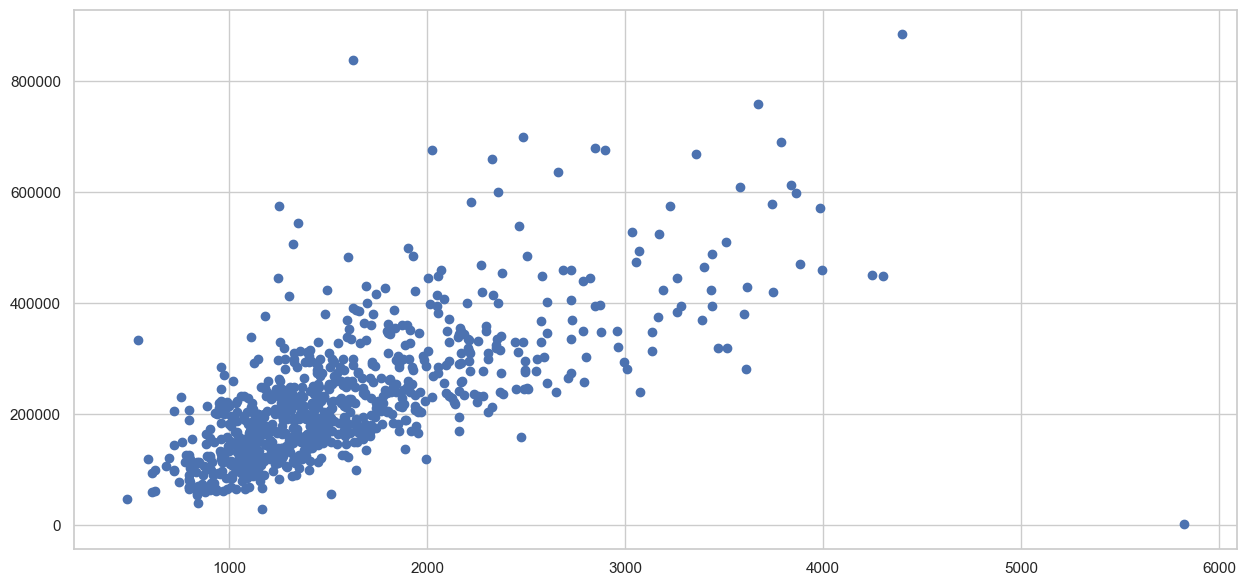

In [491]:
draw_scatter_plot(data['sq__ft'], data['price'])

In [761]:
data[['beds','baths']].corr()

,beds,baths
beds,1.000000,0.659514
baths,0.659514,1.000000


#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict the price of a house using the price values alone? (Hint: it is a simple calculation)



In [763]:
# ANSWER

data['y_mean'] = data['price'].mean()
#data['y_mean'] = data.groupby('type')['price'].transform('mean')

In [1037]:
X = data['sq__ft']
Y = data['price']
Ymean = data['y_mean']


In [767]:
def draw_plot(X, Y, Ymean):
    fig = plt.figure(figsize=(15,7))
    ax = plt.gca()
    ax.scatter(X, Y, c='b')
    ax.plot(X, Ymean, color='r');
    plt.show();

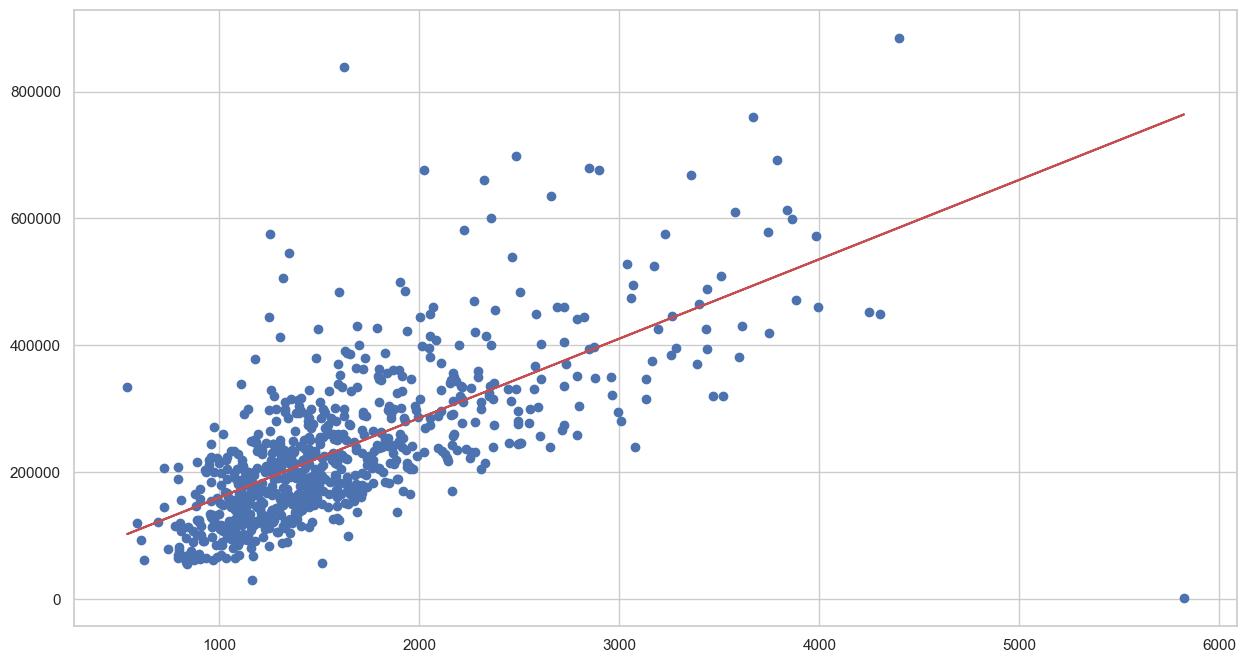

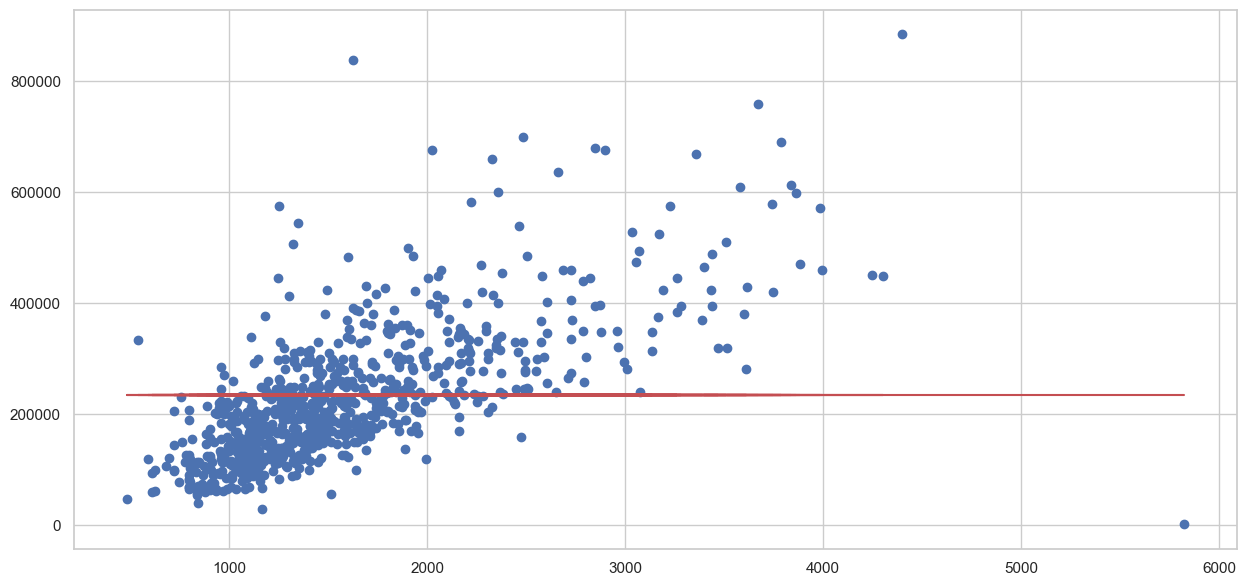

In [769]:
draw_plot(X,Y, Ymean)

In [499]:
Ymean

0      234144.263959
1      234144.263959
2      234144.263959
3      234144.263959
4      234144.263959
           ...      
980    234144.263959
981    234144.263959
982    234144.263959
983    234144.263959
984    234144.263959
Name: y_mean, Length: 985, dtype: float64

In [771]:
data['price']

0       59222
1       68212
2       68880
3       69307
4       81900
        ...  
980    232425
981    234000
982    235000
983    235301
984    235738
Name: price, Length: 985, dtype: int64

In [773]:
data = data[data['type'] == 'Residential']

In [775]:
data['type'].value_counts()

type
Residential    818
Name: count, dtype: int64

In [203]:
#data['y_mean'] = data.groupby('type')['price'].transform('mean')

In [779]:
data.loc[data['beds'].isna(), 'price'] = np.nan

In [803]:
data.loc[data['sq__ft'].isna(), 'price'] = np.nan

In [847]:
data = data.dropna(subset=['price'])

In [849]:
data['price'].isna().sum()

0

In [851]:
data['sq__ft'].isna().sum()

0

In [853]:
data[data['sq__ft'].isna()]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,y_mean


In [795]:
data['beds'].isna().sum()

0

In [871]:
X.sort_values()

292     539.0
18      588.0
168     610.0
338     623.0
371     696.0
        ...  
317    3992.0
535    4246.0
534    4303.0
864    4400.0
866    5822.0
Name: sq__ft, Length: 759, dtype: float64

In [867]:
X

0       836.0
1      1167.0
2       796.0
3       852.0
4       797.0
        ...  
980    2280.0
981    1477.0
982    1216.0
983    1685.0
984    1362.0
Name: sq__ft, Length: 759, dtype: float64

In [869]:
Y

0       59222.0
1       68212.0
2       68880.0
3       69307.0
4       81900.0
         ...   
980    232425.0
981    234000.0
982    235000.0
983    235301.0
984    235738.0
Name: price, Length: 759, dtype: float64

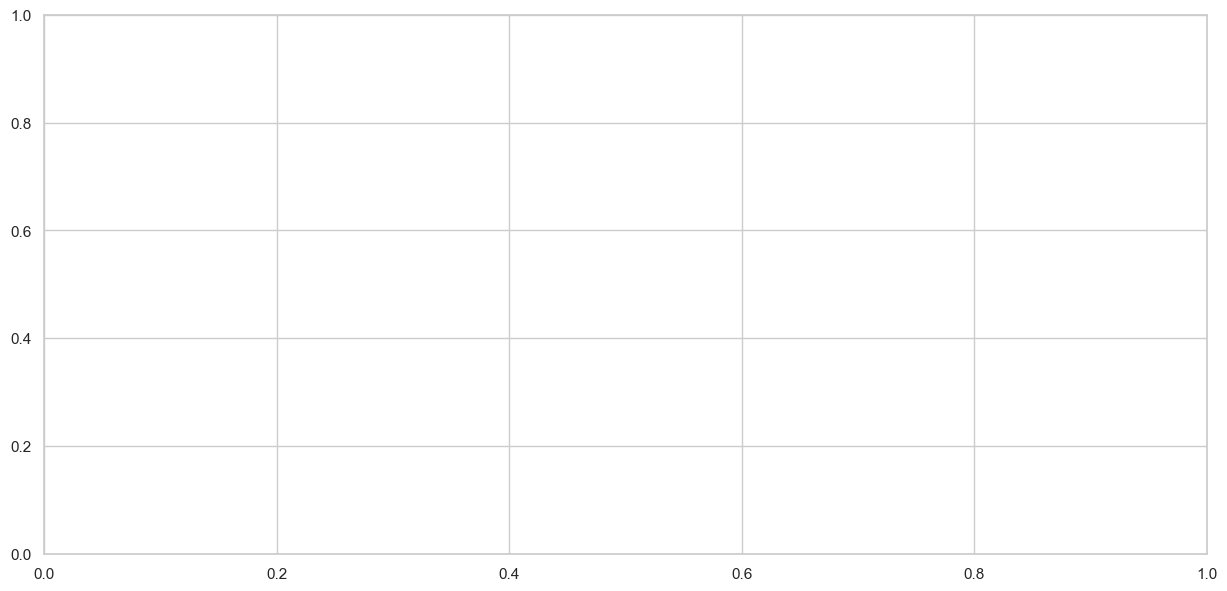

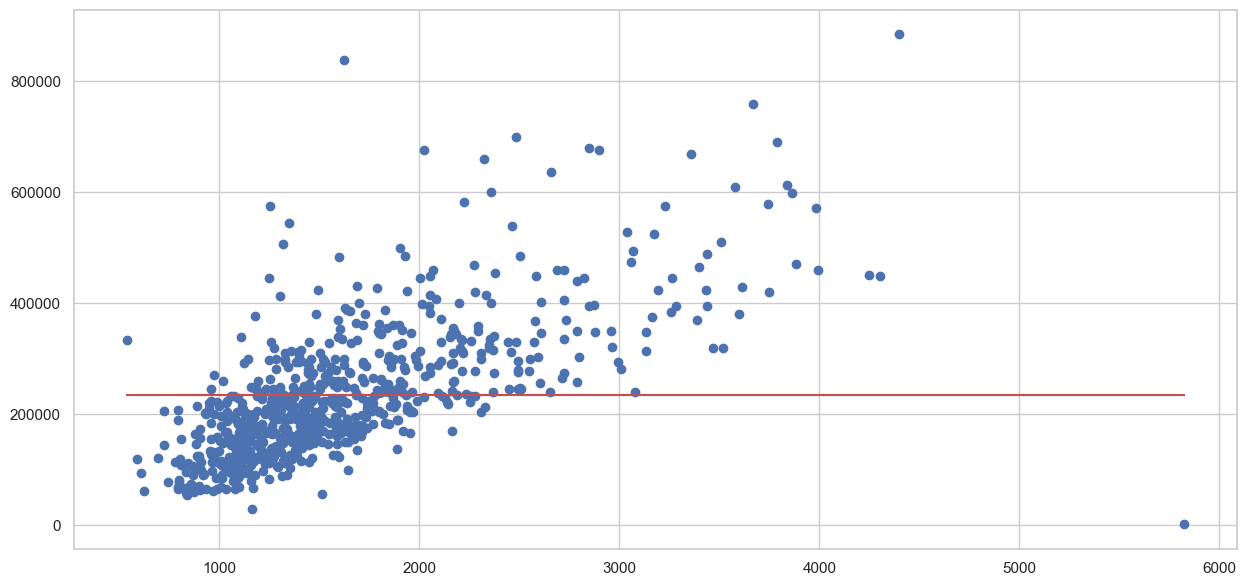

In [873]:
draw_plot(X,Y, Ymean)

#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [875]:
# ANSWER
res = abs(data['price'] - data['y_mean'])
res


0      174922.263959
1      165932.263959
2      165264.263959
3      164837.263959
4      152244.263959
           ...      
980      1719.263959
981       144.263959
982       855.736041
983      1156.736041
984      1593.736041
Length: 759, dtype: float64

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable
- Y = Target Variable

In [983]:
# ANSWER
X = data['sq__ft']
y = data['price']

In [985]:
X

0       836.0
1      1167.0
2       796.0
3       852.0
4       797.0
        ...  
980    2280.0
981    1477.0
982    1216.0
983    1685.0
984    1362.0
Name: sq__ft, Length: 758, dtype: float64

In [987]:
y

0       59222.0
1       68212.0
2       68880.0
3       69307.0
4       81900.0
         ...   
980    232425.0
981    234000.0
982    235000.0
983    235301.0
984    235738.0
Name: price, Length: 758, dtype: float64

In [989]:
X.value_counts()

sq__ft
1120.0    8
1410.0    5
1080.0    5
904.0     4
1152.0    4
         ..
3192.0    1
3746.0    1
2607.0    1
2016.0    1
1319.0    1
Name: count, Length: 569, dtype: int64

In [887]:
data['sq__ft'].max()

5822.0

In [885]:
data['sq__ft'].min()

539.0

In [891]:
data['price'].max()

884790.0

In [991]:
data['price'].min()

30000.0

In [993]:
data.sort_values(by='sq__ft')

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,y_mean,Yhat
292,5411 10TH AVE,SACRAMENTO,95820,CA,2.0,1,539.0,Residential,Tue May 20 00:00:00 EDT 2008,334000.0,38.542727,-121.442449,234144.263959,99152.424480
18,250 PERALTA AVE,SACRAMENTO,95833,CA,2.0,1,588.0,Residential,Wed May 21 00:00:00 EDT 2008,120000.0,38.612099,-121.469095,234144.263959,105316.701332
168,5028 14TH AVE,SACRAMENTO,95820,CA,2.0,1,610.0,Residential,Tue May 20 00:00:00 EDT 2008,93675.0,38.539420,-121.446894,234144.263959,108084.335837
338,4030 BROADWAY,SACRAMENTO,95817,CA,2.0,1,623.0,Residential,Mon May 19 00:00:00 EDT 2008,62050.0,38.546798,-121.460038,234144.263959,109719.756227
371,2621 EVERGREEN ST,SACRAMENTO,95815,CA,3.0,1,696.0,Residential,Mon May 19 00:00:00 EDT 2008,121725.0,38.613103,-121.444085,234144.263959,118903.270721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,7756 TIGERWOODS DR,SACRAMENTO,95829,CA,5.0,3,3984.0,Residential,Tue May 20 00:00:00 EDT 2008,572500.0,38.476430,-121.309243,234144.263959,532538.827666
317,9760 LAZULITE CT,ELK GROVE,95624,CA,4.0,3,3992.0,Residential,Tue May 20 00:00:00 EDT 2008,460000.0,38.403609,-121.335541,234144.263959,533545.240213
535,3027 PALMATE WAY,SACRAMENTO,95834,CA,5.0,3,4246.0,Residential,Mon May 19 00:00:00 EDT 2008,452000.0,38.628955,-121.529269,234144.263959,565498.838590
534,5201 BLOSSOM RANCH DR,ELK GROVE,95757,CA,4.0,4,4303.0,Residential,Mon May 19 00:00:00 EDT 2008,450000.0,38.399436,-121.444041,234144.263959,572669.527990


In [995]:
data.sort_values(by='beds')

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,y_mean,Yhat
12,2930 LA ROSA RD,SACRAMENTO,95815,CA,1.0,1,871.0,Residential,Wed May 21 00:00:00 EDT 2008,106852.0,38.618698,-121.435833,234144.263959,140918.545193
0,3526 HIGH ST,SACRAMENTO,95838,CA,2.0,1,836.0,Residential,Wed May 21 00:00:00 EDT 2008,59222.0,38.631913,-121.434879,234144.263959,136515.490299
711,2327 32ND ST,SACRAMENTO,95817,CA,2.0,1,1115.0,Residential,Fri May 16 00:00:00 EDT 2008,220000.0,38.557433,-121.470340,234144.263959,171614.127886
193,3328 22ND AVE,SACRAMENTO,95820,CA,2.0,1,722.0,Residential,Tue May 20 00:00:00 EDT 2008,145000.0,38.532727,-121.470783,234144.263959,122174.111500
697,6320 EL DORADO ST,EL DORADO,95623,CA,2.0,1,1040.0,Residential,Fri May 16 00:00:00 EDT 2008,205000.0,38.678758,-120.844118,234144.263959,162179.010255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,3027 PALMATE WAY,SACRAMENTO,95834,CA,5.0,3,4246.0,Residential,Mon May 19 00:00:00 EDT 2008,452000.0,38.628955,-121.529269,234144.263959,565498.838590
120,4359 CREGAN CT,RANCHO CORDOVA,95742,CA,5.0,4,3516.0,Residential,Wed May 21 00:00:00 EDT 2008,320000.0,38.545128,-121.224922,234144.263959,473663.693648
136,7105 DANBERG WAY,ELK GROVE,95757,CA,5.0,3,3164.0,Residential,Wed May 21 00:00:00 EDT 2008,375000.0,38.401900,-121.420388,234144.263959,429381.541566
137,5579 JERRY LITELL WAY,SACRAMENTO,95835,CA,5.0,3,3599.0,Residential,Wed May 21 00:00:00 EDT 2008,381300.0,38.677126,-121.500519,234144.263959,484105.223827


In [1017]:
Y=y

In [997]:
y

0       59222.0
1       68212.0
2       68880.0
3       69307.0
4       81900.0
         ...   
980    232425.0
981    234000.0
982    235000.0
983    235301.0
984    235738.0
Name: price, Length: 758, dtype: float64

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [1001]:
# ANSWER

def calculate_beta_1(X,Y):
    Xbar= X.mean()
    Ybar= Y.mean()

    n = np.sum((Y-Ybar)*(X-Xbar))
    d = np.sum(np.square(X-Xbar))

    beta1 = n/d
    return beta1

In [1003]:
beta_1 = calculate_beta_1(X,y)
beta_1

136.04637916599273

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [901]:
# ANSWER
def calculate_beta_0(X,Y):
    Xbar = X.mean()
    Ybar = Y.mean()

    beta_0 = Ybar - calculate_beta_1(X,Y)*Xbar
    return beta_0

In [1005]:
beta_0 = calculate_beta_0(X,y)
beta_0

15838.383463938022

In [1007]:
X

0       836.0
1      1167.0
2       796.0
3       852.0
4       797.0
        ...  
980    2280.0
981    1477.0
982    1216.0
983    1685.0
984    1362.0
Name: sq__ft, Length: 758, dtype: float64

In [1025]:
y


0       59222.0
1       68212.0
2       68880.0
3       69307.0
4       81900.0
         ...   
980    232425.0
981    234000.0
982    235000.0
983    235301.0
984    235738.0
Name: price, Length: 758, dtype: float64

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [1027]:
# ANSWER
def calculate_yhat(x,b0,b1):
    return b0 + b1*x

In [1063]:
Yhat = calculate_yhat(X, beta_0, beta_1)
Yhat

0      129573.156447
1      174604.507951
2      124131.301280
3      131749.898513
4      124267.347659
           ...      
980    326024.127962
981    216778.885492
982    181270.780530
983    245076.532359
984    201133.551888
Name: sq__ft, Length: 758, dtype: float64

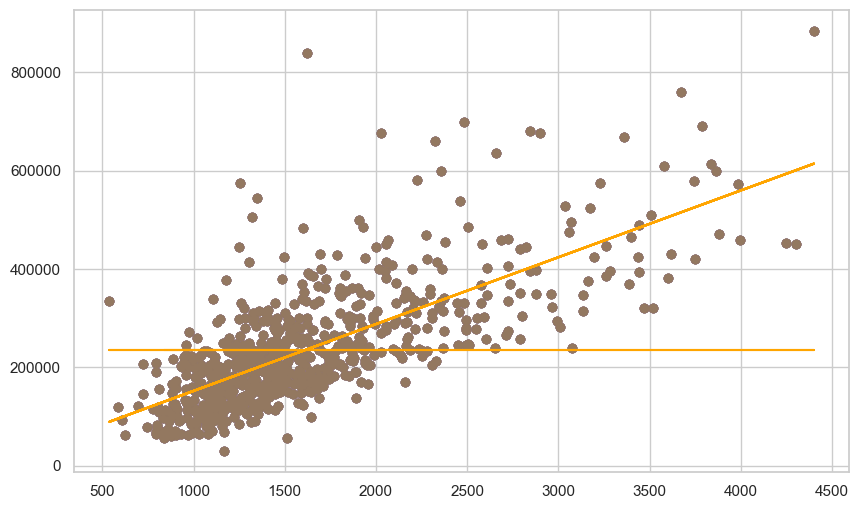

In [1039]:
plt.plot(X,Yhat, color='orange')
plt.scatter(X, Y)
plt.plot(X,Ymean, color='orange')
plt.show()

##### 2.7.D Find Residuals

In [1041]:
def calculate_residual(Y, Yhat):
    res = Y - Yhat
    return res;

In [917]:
resi = calculate_residual(Y, Yhat)
abs(resi)

0       77293.490299
1      109943.809444
2       62603.427562
3       69221.315393
4       49709.229131
           ...      
980     85747.955089
981     16845.704348
982     50679.913704
983      8020.021882
984     33050.884715
Length: 759, dtype: float64

##### 2.7.E Find R-Squared

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{tot} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Squared value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [1043]:
# ANSWER
def calculate_total_sum_of_square(Y):
    Ybar = np.mean(Y)
    SStot = np.square(Y-Ybar)
    SStot =np.sum(SStot)
    return SStot

In [1045]:
def calculate_residual_sum_of_square(Y, Yhat):
    SSres = np.square(Y - Yhat)
    SSres = np.sum(SSres)
    return SSres

In [1047]:
def calculate_r_square(Y, Yhat):
    SStot = calculate_total_sum_of_square(Y)
    SSres = calculate_residual_sum_of_square(Y, Yhat)
    Rsquare = 1 - (SSres/SStot)
    return Rsquare

In [1049]:
calculate_r_square(Y, np.mean(Y))

0.0

In [1051]:
calculate_r_square(Y, calculate_yhat(X, beta_0, beta_1))

0.5297350152392348

##### 2.7.F [BONUS] Draw Plot of Predicted Line

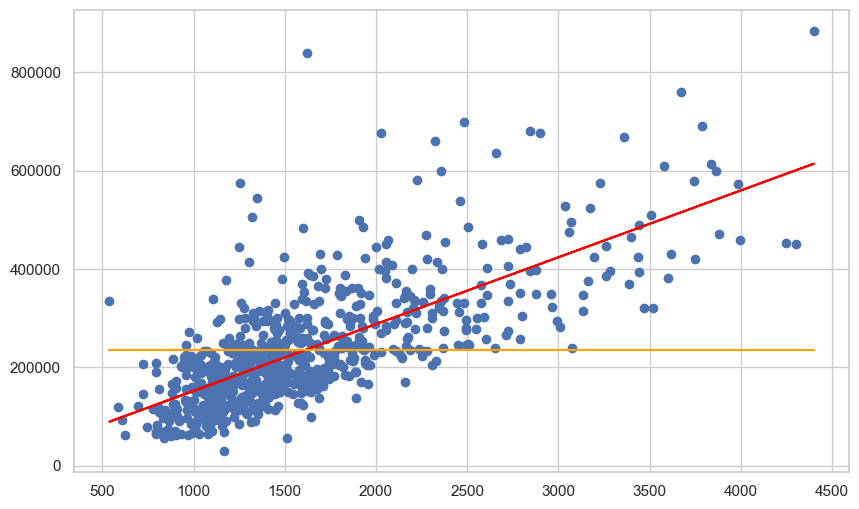

In [1053]:
# ANSWER
plt.plot(X,Yhat, color='red')
plt.scatter(X, Y)
plt.plot(X,Ymean, color='orange')
plt.show()



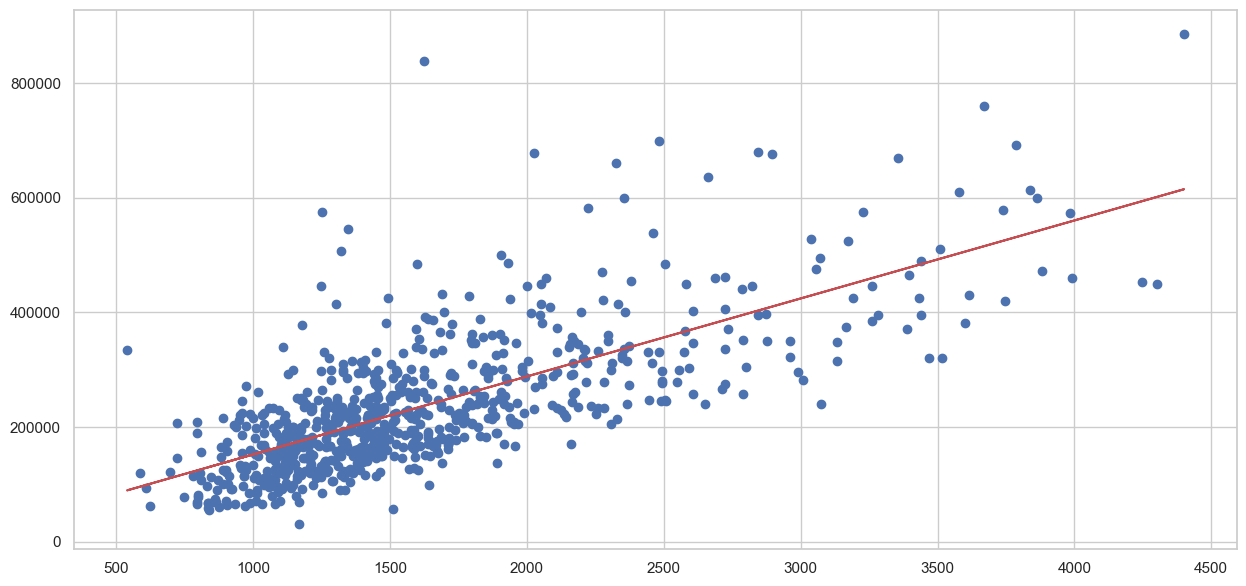

In [1055]:
draw_plot(X, Y, Yhat)

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

In [1065]:
# ANSWER
data['Yhat'] = Yhat

C:\Users\pabarca\AppData\Local\Temp\ipykernel_24160\2239723526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Yhat'] = Yhat


In [1057]:
data

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,y_mean,Yhat
0,3526 HIGH ST,SACRAMENTO,95838,CA,2.0,1,836.0,Residential,Wed May 21 00:00:00 EDT 2008,59222.0,38.631913,-121.434879,234144.263959,136515.490299
1,51 OMAHA CT,SACRAMENTO,95823,CA,3.0,1,1167.0,Residential,Wed May 21 00:00:00 EDT 2008,68212.0,38.478902,-121.431028,234144.263959,178155.809444
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2.0,1,796.0,Residential,Wed May 21 00:00:00 EDT 2008,68880.0,38.618305,-121.443839,234144.263959,131483.427562
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2.0,1,852.0,Residential,Wed May 21 00:00:00 EDT 2008,69307.0,38.616835,-121.439146,234144.263959,138528.315393
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2.0,1,797.0,Residential,Wed May 21 00:00:00 EDT 2008,81900.0,38.519470,-121.435768,234144.263959,131609.229131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4.0,3,2280.0,Residential,Thu May 15 00:00:00 EDT 2008,232425.0,38.457679,-121.359620,234144.263959,318172.955089
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3.0,2,1477.0,Residential,Thu May 15 00:00:00 EDT 2008,234000.0,38.499893,-121.458890,234144.263959,217154.295652
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3.0,2,1216.0,Residential,Thu May 15 00:00:00 EDT 2008,235000.0,38.708824,-121.256803,234144.263959,184320.086296
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4.0,2,1685.0,Residential,Thu May 15 00:00:00 EDT 2008,235301.0,38.417000,-121.397424,234144.263959,243321.021882


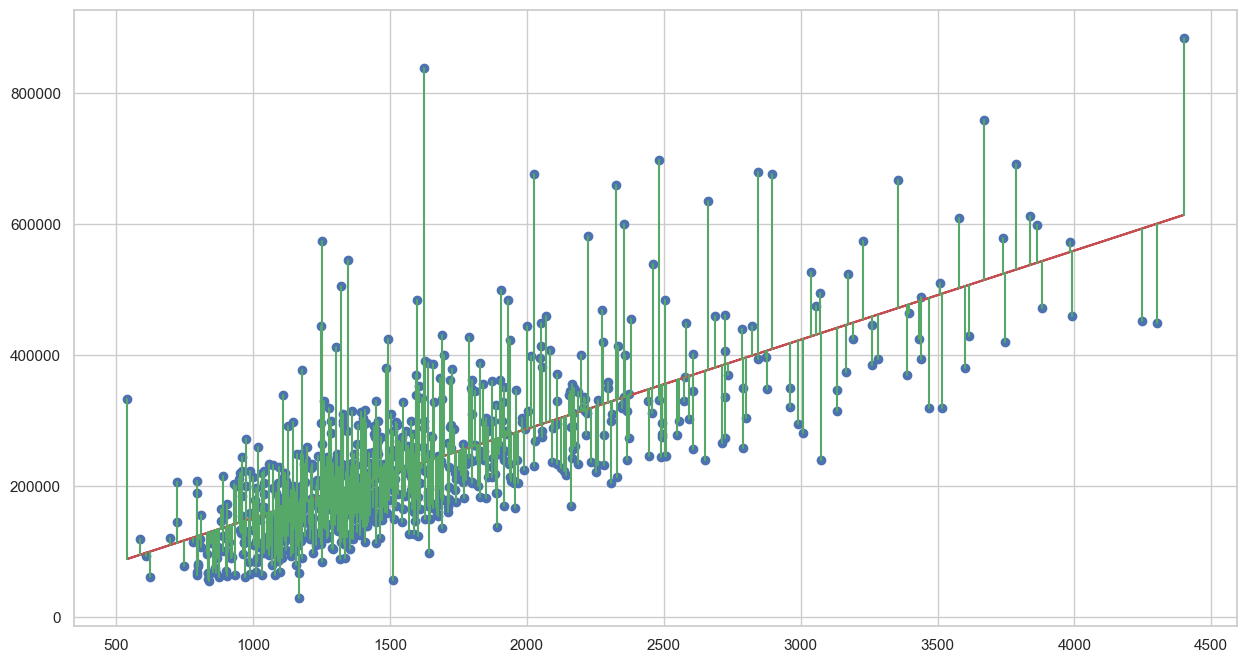

In [1067]:
fig = plt.figure(figsize =(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

ax = fig.gca()

ax.scatter(x=X, y=Y, c= 'b')
ax.plot(X, Yhat, color='r');

for _, row in data.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']),(row['price'], row['Yhat']), 'g-' )


plt.show()

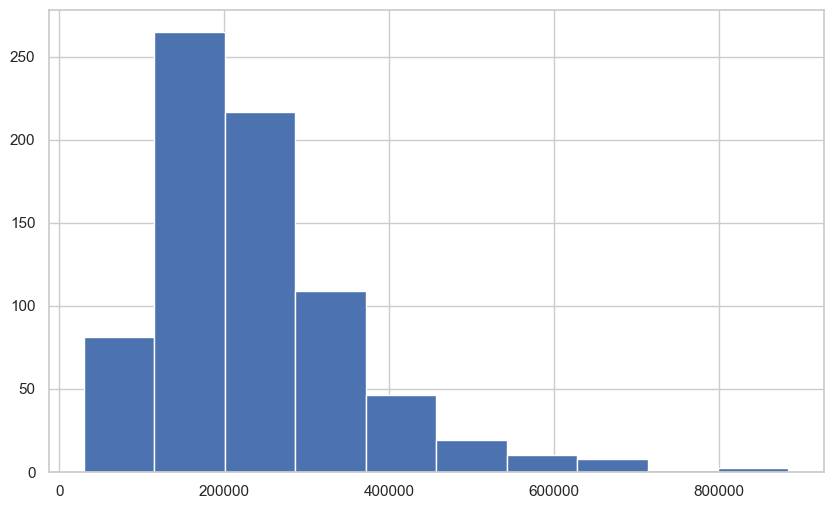

In [1069]:
plt.hist(data['price'])
plt.show()

In [1071]:
data.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude,y_mean,Yhat
count,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,7.580000e+02,758.000000
mean,95760.810026,3.298153,1.969657,1611.738786,235109.609499,38.574409,-121.379039,2.341443e+05,235109.609499
std,85.068848,0.776655,0.638176,643.078951,120204.836417,0.127108,0.120887,2.125982e-09,87488.562746
min,95603.000000,1.000000,1.000000,539.000000,30000.000000,38.241514,-121.550527,2.341443e+05,89167.381834
25%,95670.000000,3.000000,2.000000,1167.500000,155575.000000,38.472118,-121.452200,2.341443e+05,174672.531140
50%,95819.500000,3.000000,2.000000,1442.000000,212932.000000,38.585353,-121.410467,2.341443e+05,212017.262221
75%,95828.000000,4.000000,2.000000,1857.000000,290000.000000,38.676102,-121.326348,2.341443e+05,268476.509575
max,95864.000000,6.000000,5.000000,4400.000000,884790.000000,39.008159,-120.597599,2.341443e+05,614442.451794


In [973]:
data = data[data['price'] != 2000]

In [975]:
data.loc[data['price'] == 2000]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,y_mean,Yhat


In [977]:
data['price'].min()

30000.0

In [1073]:
data.sort_values(by='price')

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,y_mean,Yhat
603,8208 WOODYARD WAY,CITRUS HEIGHTS,95621,CA,3.0,2,1166.0,Residential,Fri May 16 00:00:00 EDT 2008,30000.0,38.715322,-121.314787,234144.263959,174468.461571
605,15 LOORZ CT,SACRAMENTO,95823,CA,2.0,1,838.0,Residential,Fri May 16 00:00:00 EDT 2008,55422.0,38.471646,-121.435158,234144.263959,129845.249205
867,7401 TOULON LN,SACRAMENTO,95828,CA,4.0,2,1512.0,Residential,Thu May 15 00:00:00 EDT 2008,56950.0,38.488628,-121.387759,234144.263959,221540.508763
0,3526 HIGH ST,SACRAMENTO,95838,CA,2.0,1,836.0,Residential,Wed May 21 00:00:00 EDT 2008,59222.0,38.631913,-121.434879,234144.263959,129573.156447
869,5937 BAMFORD DR,SACRAMENTO,95823,CA,2.0,1,876.0,Residential,Thu May 15 00:00:00 EDT 2008,61000.0,38.471139,-121.432255,234144.263959,135015.011613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,12901 FURLONG DR,WILTON,95693,CA,5.0,3,3788.0,Residential,Mon May 19 00:00:00 EDT 2008,691659.0,38.413535,-121.188211,234144.263959,531182.067745
333,1409 47TH ST,SACRAMENTO,95819,CA,5.0,2,2484.0,Residential,Tue May 20 00:00:00 EDT 2008,699000.0,38.563244,-121.446876,234144.263959,353777.589312
553,6222 CALLE MONTALVO CIR,GRANITE BAY,95746,CA,5.0,3,3670.0,Residential,Mon May 19 00:00:00 EDT 2008,760000.0,38.779435,-121.146676,234144.263959,515128.595003
334,3935 EL MONTE DR,LOOMIS,95650,CA,4.0,4,1624.0,Residential,Tue May 20 00:00:00 EDT 2008,839000.0,38.813337,-121.133348,234144.263959,236777.703230


In [669]:
data['price'].value_counts()

price
220000    9
150000    7
205000    7
170000    7
230000    7
         ..
465000    1
420000    1
406026    1
402000    1
235738    1
Name: count, Length: 507, dtype: int64

In [1075]:

data.sort_values(by='price')

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,y_mean,Yhat
603,8208 WOODYARD WAY,CITRUS HEIGHTS,95621,CA,3.0,2,1166.0,Residential,Fri May 16 00:00:00 EDT 2008,30000.0,38.715322,-121.314787,234144.263959,174468.461571
605,15 LOORZ CT,SACRAMENTO,95823,CA,2.0,1,838.0,Residential,Fri May 16 00:00:00 EDT 2008,55422.0,38.471646,-121.435158,234144.263959,129845.249205
867,7401 TOULON LN,SACRAMENTO,95828,CA,4.0,2,1512.0,Residential,Thu May 15 00:00:00 EDT 2008,56950.0,38.488628,-121.387759,234144.263959,221540.508763
0,3526 HIGH ST,SACRAMENTO,95838,CA,2.0,1,836.0,Residential,Wed May 21 00:00:00 EDT 2008,59222.0,38.631913,-121.434879,234144.263959,129573.156447
869,5937 BAMFORD DR,SACRAMENTO,95823,CA,2.0,1,876.0,Residential,Thu May 15 00:00:00 EDT 2008,61000.0,38.471139,-121.432255,234144.263959,135015.011613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,12901 FURLONG DR,WILTON,95693,CA,5.0,3,3788.0,Residential,Mon May 19 00:00:00 EDT 2008,691659.0,38.413535,-121.188211,234144.263959,531182.067745
333,1409 47TH ST,SACRAMENTO,95819,CA,5.0,2,2484.0,Residential,Tue May 20 00:00:00 EDT 2008,699000.0,38.563244,-121.446876,234144.263959,353777.589312
553,6222 CALLE MONTALVO CIR,GRANITE BAY,95746,CA,5.0,3,3670.0,Residential,Mon May 19 00:00:00 EDT 2008,760000.0,38.779435,-121.146676,234144.263959,515128.595003
334,3935 EL MONTE DR,LOOMIS,95650,CA,4.0,4,1624.0,Residential,Tue May 20 00:00:00 EDT 2008,839000.0,38.813337,-121.133348,234144.263959,236777.703230


In [1079]:
calculate_r_square(Y, calculate_yhat(X, beta_0, beta_1))


0.5297350152392348

In [ ]:
#An R² value of 0.6776 means that approximately 67.76% of the variation in the dependent variable is explained 
#by your model. In other words, your model's predictors account for about two-thirds of the variability in the outcome.

#In summary, your model explains roughly 68% of the variation in the outcome, which suggests it has a fair amount 
#of predictive power, but there is still room for improvement or additional factors that might explain the remaining 
#variation


### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [1077]:
# ANSWER

x_pred = 1204
#prediction = calculate_yhat(data[data['sq__ft' == '1204']], beta_0, beta_1 )

prediction = beta_1 * x_pred + beta_0

prediction

179638.22397979329

In [616]:
data['beds'].value_counts()

beds
3.0    406
4.0    250
2.0    102
5.0     57
6.0      2
1.0      1
Name: count, dtype: int64

In [939]:
#To compare with sklearn regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

data_clean = data.dropna(subset=['sq__ft', 'price'])

X = data_clean[['sq__ft']]
y = data_clean[['price']]



model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
print("R² value:", r2)

R² value: 0.47620818110567087




---



---



> > > > > > > > > © 2024 Institute of Data


---



---



